Logistic Regression


STEP 1: Import required libraries

1. numpy  -> numerical computations

2. pandas -> dataset creation and manipulation

3. sklearn.model_selection -> train-test split

4. sklearn.linear_model -> Logistic Regression model

5. sklearn.metrics -> model evaluation

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

STEP 2: Create a simple Student Admission dataset manually

Dataset has:

40 rows (samples)

4 input features + 1 target column

Target -> 1 (Admitted), 0 (Not Admitted)

In [2]:
data = {
    "Study_Hours": [
        1,2,2,3,3,4,4,5,5,6,
        1,2,3,4,5,6,2,3,4,5,
        6,7,8,9,10,7,8,9,10,6,
        7,8,9,10,5,6,7,8,9,10
    ],

    "Attendance_%": [
        50,55,60,65,70,75,80,85,90,95,
        45,50,60,70,80,90,55,65,75,85,
        95,85,90,92,95,88,90,93,96,89,
        90,92,94,97,80,85,88,91,94,98
    ],

    "Previous_Score": [
        40,45,50,55,60,65,70,75,80,85,
        35,40,50,60,70,80,45,55,65,75,
        85,78,82,88,92,76,80,86,91,79,
        83,87,90,94,72,77,84,89,93,96
    ],

    "Assignments_Completed": [
        1,2,2,3,3,4,4,5,5,6,
        1,2,3,4,5,6,2,3,4,5,
        6,7,8,9,10,7,8,9,10,6,
        7,8,9,10,5,6,7,8,9,10
    ],

    # Target Variable
    "Admitted": [
        0,0,0,0,0,0,1,1,1,1,
        0,0,0,1,1,1,0,0,1,1,
        1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,1,1,1,1,1
    ]
}

df = pd.DataFrame(data)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (40, 5)


,Study_Hours,Attendance_%,Previous_Score,Assignments_Completed,Admitted
0,1,50,40,1,0
1,2,55,45,2,0
2,2,60,50,2,0
3,3,65,55,3,0
4,3,70,60,3,0


 STEP 3: Separate Features (X) and Target (y)
 
 X -> Independent variables
 
 y -> Target variable (Admitted)

In [3]:
X = df.drop("Admitted", axis=1)
y = df["Admitted"]

print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape :", y.shape)

Feature Matrix Shape: (40, 4)
Target Vector Shape : (40,)


STEP 4: Split dataset into Training and Testing sets

 80% data -> training
 
 20% data -> testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size :", X_test.shape)

Training data size: (32, 4)
Testing data size : (8, 4)


STEP 5: Create Logistic Regression Model

In [5]:
model = LogisticRegression()

STEP 6: train the model 

In [7]:
model.fit(X_train, y_train)

print("Model training completed successfully.")

Model training completed successfully.



 STEP 7: View learned parameters
 
 intercept_ -> base log-odds

 coef_ -> importance of each feature

In [8]:
print("Intercept:", model.intercept_)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coefficients

Intercept: [-21.18386875]


,Feature,Coefficient
0,Study_Hours,0.310191
1,Attendance_%,0.110945
2,Previous_Score,0.177778
3,Assignments_Completed,0.310191


STEP 8: Predict Admission for test data

In [9]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

comparison

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1


 STEP 9: Evaluate model performance  & Accuracy -> percentage of correct predictions

In [10]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[3 0]
 [0 5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



STEP 10: Visualize Classification Result  &  Simple visualization using first two features


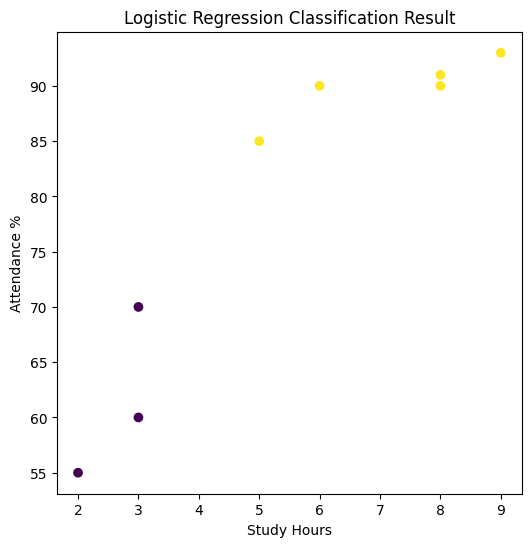

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(
    X_test.iloc[:,0],
    X_test.iloc[:,1],
    c=y_pred
)

plt.xlabel("Study Hours")
plt.ylabel("Attendance %")
plt.title("Logistic Regression Classification Result")
plt.show()
